# Lets Do Keras

## Dependencies
* As usual, normal Keras model, layers
* Numpy for array operations
* Matplotlib for visualization
* Tensorflow?? 

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np


D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Dataset Preparation
> Most time consuming and sensitive part of any ML project is dataset preparation. Good dataset always preserves space and time. We will see why?

* Load dataset
* View their shape
* View some of examples
* Make dataset good for a model
* Dataset normalization? 


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

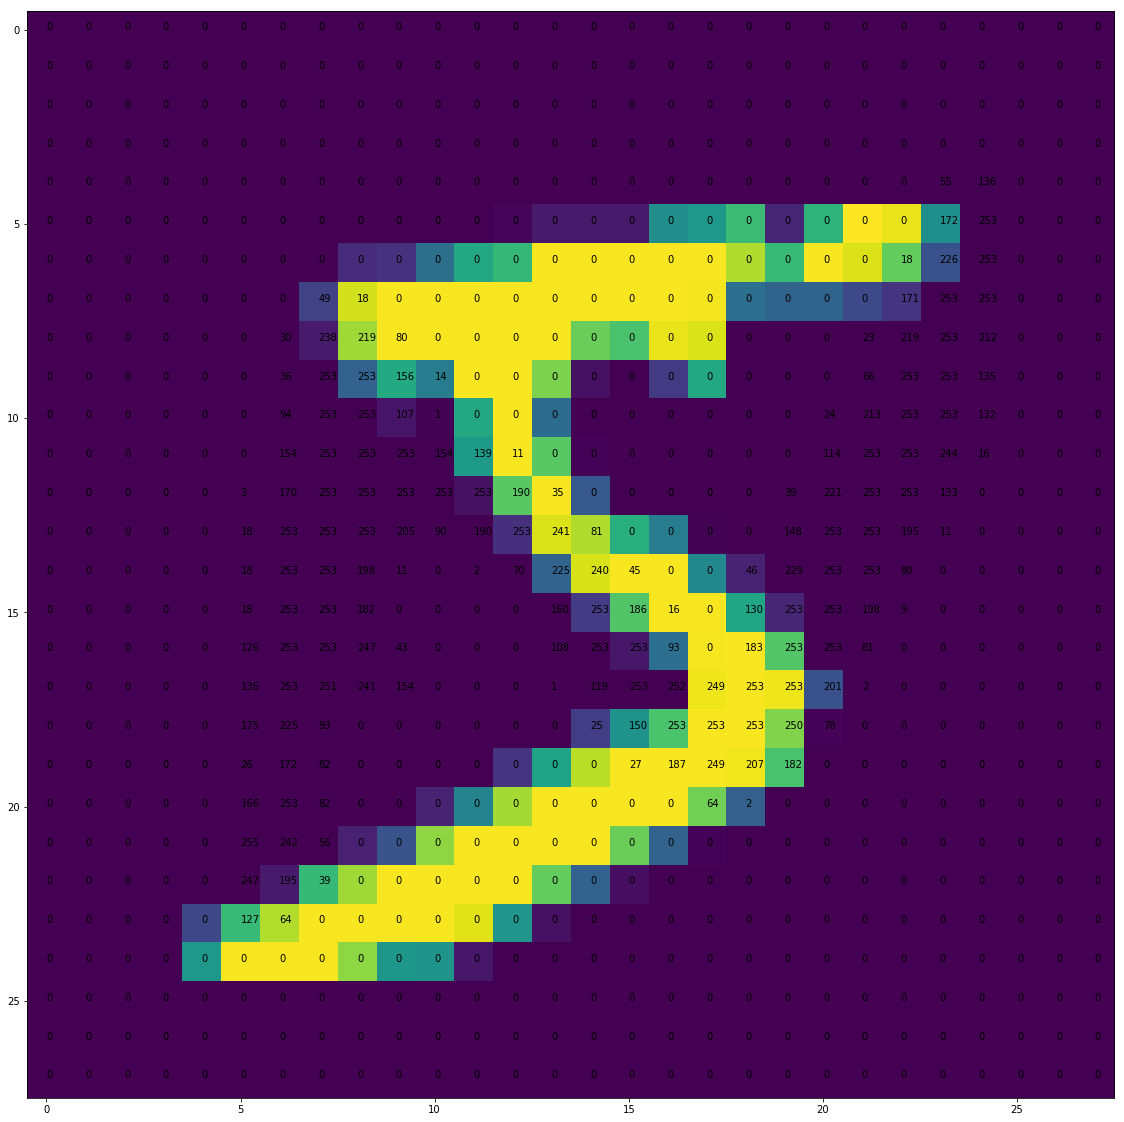

In [6]:
# annotate #Add detail
img = x_train[0]
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
r = 0
for rows in img:
    c = 0
    for pixel in rows:
        ax.annotate(pixel, xy=(r, c))
        c=c+1
    r=r+1

ax.imshow(img)
plt.show()

In [7]:
## View input shape

In [8]:
x_train.shape, y_train.shape
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
 y_train.shape

(60000,)

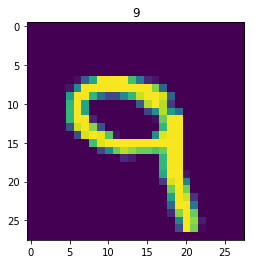

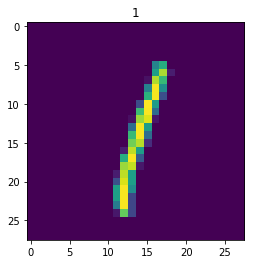

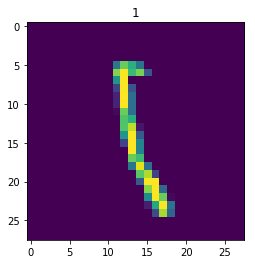

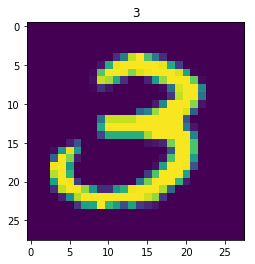

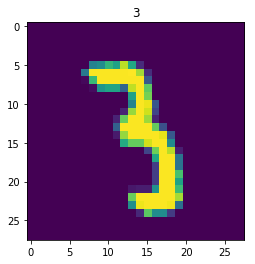

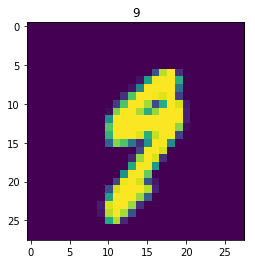

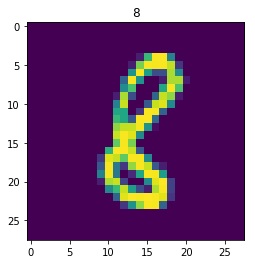

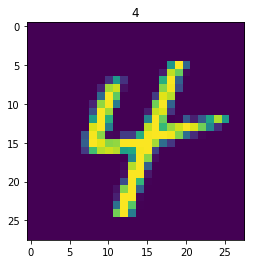

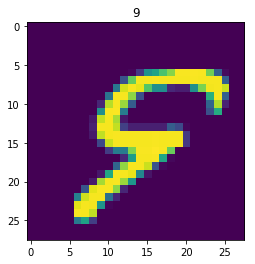

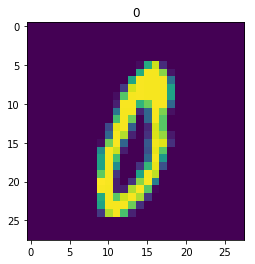

In [10]:
rand_index = np.random.randint(1, 59999, 10)

for index in rand_index:
    plt.imshow(x_train[index])
    plt.title(y_train[index])
    plt.show()

In [17]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [18]:
model = Sequential()

model.add(Dense(1, input_dim = 28*28, activation = 'linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss = 'mse', optimizer='sgd', metrics=['acc', 'mse'])

In [21]:
history = model.fit(x_train, y_train, batch_size=32, epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 4s 63us/sample - loss: nan - acc: 0.0987 - mse: nan


dict_keys(['loss', 'acc', 'mse'])


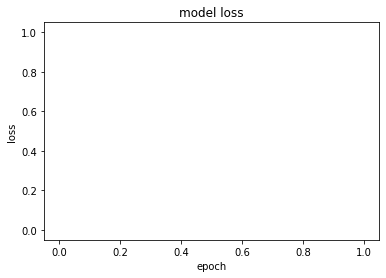

In [22]:
# list all data in history
print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.show()

# summarize history for loss
plt.plot(history.history['mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Nothing interesting HUH?? Whats next?
* Normalize the data by dividing by 255. Magic happens
* Just add another layer, Miracle??
* Use another activation and more epochs, I just became AI Pro?



In [51]:
test = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Whats next? 
* Lets try classification rather than regression problem.
* We will convert our label to multiclass data by using keras to_categorical()

In [27]:
model.predict(x_test[0].reshape(1, 784)), y_test[0]

(array([[1., 0., 0., 0., 1., 0., 1., 0., 0., 0.]], dtype=float32), 7)

In [28]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)

Using TensorFlow backend.


In [29]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [30]:
model = Sequential()

#just add 10 units cuz we have 10 categories
model.add(Dense(10, input_dim = 28*28, activation = 'linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='mse', optimizer='sgd', metrics=['acc'])

In [32]:
model.fit(x_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 7s 111us/sample - loss: nan - acc: 0.0985


## Nothing fun??
* Just use categorical crossentropy

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [34]:
model.fit(x_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 7s 125us/sample - loss: nan - acc: 0.0987


## It was Just another prank
* Use sigmoid instead of linear

In [52]:
model = Sequential()

#just add 10 units cuz we have 10 categories
model.add(Dense(10, input_shape = (784, ), activation = 'sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])
model.fit(x_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 7s 123us/sample - loss: 2.2720 - acc: 0.0988


## Yay!!
* Try to reach accuracy above 90

Tasks:
* Try to reach accuracy above 90%
* Use linear function only, any number of epochs. 
* Try number of batch also.
* Try using different losses.
* Try studying about image processing from OpenCv
    * Image? image representation(color spaces)
    * Filters, convolution process